<a href="https://colab.research.google.com/github/mohithxoxo/unsupervised-Learning/blob/master/KMeans_Clustering_with_BankDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. K-Means Clustering:

In [104]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
# Importing the data.
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/mohithxoxo/Datasets/master/fraud_transactions.csv")
data.head()

,starttime,stoptime,anumber,bnumber,duration,fee,destination,type,label
0,2018-05-02 09:13:24,2018-05-02 09:20:38,62770692960,1500200,434,6000,callcenter,Injapati,0
1,2018-05-18 16:49:19,2018-05-18 16:52:11,62770692960,1500200,172,2250,callcenter,Injapati,0
2,2018-05-18 18:15:17,2018-05-18 18:18:20,62770692960,1500200,183,3000,callcenter,Injapati,0
3,2018-05-31 08:52:46,2018-05-31 08:53:03,62770692253,1500788,17,750,callcenter,Injapati,0
4,2018-05-31 08:53:10,2018-05-31 08:53:24,62770692253,1500788,14,750,callcenter,Injapati,0


In [28]:
data['type'].value_counts()

SLJJ          7093
SLI 001       4035
Lokal          153
SLI 007        102
VoIP 01017      21
Injapati        14
Name: type, dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])
data['destination'] = le.fit_transform(data['destination'])

In [30]:
data = data.drop(columns=['starttime','stoptime','anumber','bnumber'])

In [37]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
from imblearn.over_sampling.SMOTE

In [134]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
sm = RandomOverSampler()

print("Before ", '\n',data.iloc[:,-1].value_counts(), '\n',)
X_sm , y_sm = sm.fit_resample(X,y)
print("After ", '\n',Counter(y_sm).keys(), '\n',Counter(y_sm).values())

Before  
 0    11021
1      397
Name: label, dtype: int64 

After  
 dict_keys([0, 1]) 
 dict_values([11021, 11021])


# Using the Elbow Method to find the Optimal No. of clusters.

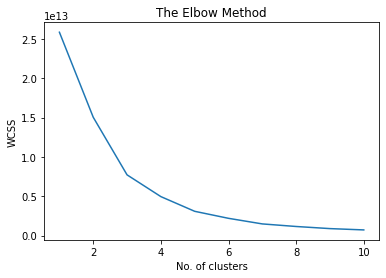

In [135]:
from sklearn.cluster import KMeans
wcss_lst = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_sm)
    wcss = kmeans.inertia_
    wcss_lst.append(wcss)


import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss_lst)
plt.title("The Elbow Method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

As for No. of clusters = 4 the graph becomes almost flat, it decreases very slowly, 
but as we need only 2 Clusters as per our problem statement, we choose n_clusters=2

In [142]:
# Training the Model on 2 clusters
kmeans = KMeans(n_clusters=2, init="k-means++", random_state=42)
kmeans.fit(X_sm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Each of the cluster is a grp of customers n that will be our dependent variable.

In [143]:
y_hat = kmeans.fit_predict(X_sm)

In [144]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(accuracy_score(y_sm,y_hat))
print(classification_report(y_sm,y_hat))


0.5095272661283006
              precision    recall  f1-score   support

           0       0.50      0.97      0.66     11021
           1       0.63      0.05      0.08     11021

    accuracy                           0.51     22042
   macro avg       0.57      0.51      0.37     22042
weighted avg       0.57      0.51      0.37     22042



Bank transaction dataset with Kmeans is the worst combination